*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [77]:
# import libraries
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

# try:
#   %tensorflow_version only exists in Colab.
#   !pip install tf-nightly
# except Exception:
#   pass
# %tensorflow_version 2.x

# import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [78]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-07-16 15:25:32--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.1’

train-data.tsv.1    100%[===================>] 349.84K  --.-KB/s    in 0.005s  

2021-07-16 15:25:32 (64.8 MB/s) - ‘train-data.tsv.1’ saved [358233/358233]

--2021-07-16 15:25:32--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.1’

valid-data.tsv.1    100%[====

In [79]:
# Naming the columns in the data set
COLUMN_NAMES = ['Type', 'Message']

In [80]:
# Reading the data
train_data = pd.read_csv(train_file_path, sep = '\t', names =COLUMN_NAMES, header=0)

In [81]:
test_data = pd.read_csv(test_file_path, sep = '\t', names =COLUMN_NAMES, header=0)

In [82]:
# Examenig the data
train_data.describe()

,Type,Message
count,4178,4178
unique,2,3934
top,ham,"sorry, i'll call later"
freq,3618,22


In [83]:
# See the duplicates
duplicat_rows = train_data[train_data.duplicated()]
print(duplicat_rows[:10])

     Type                                                                                              Message
297  spam  want to funk up ur fone with a weekly new tone reply tones2u 2 this text. www.ringtones.co.uk, t...
384   ham                                                    ok then i will come to ur home after half an hour
488   ham         watching cartoon, listening music &amp; at eve had to go temple &amp; church.. what about u?
493   ham                                                                               sorry, i'll call later
524   ham                                                                               sorry, i'll call later
529   ham                                i am in escape theatre now. . going to watch kavalan in a few minutes
554   ham                                                                               sorry, i'll call later
592   ham                                                                                                ok...
6

In [84]:
train_data.groupby('Type').describe().T


Type                               ham                                                                                                 spam
Message count                     3618                                                                                                  560
        unique                    3429                                                                                                  505
        top     sorry, i'll call later  hmv bonus special 500 pounds of genuine hmv vouchers to be won. just answer 4 easy questions. pl...
        freq                        22                                                                                                    3

In [85]:
# Visualise the words
ham_message = train_data[train_data.Type == 'ham'] # taking only 'ham' messages
spam_message = train_data[train_data.Type == 'spam'] # taking only 'spam' messages

# Create a numpy list to visalise the words
ham_message_text = " ".join(ham_message.Message.to_numpy().tolist())
spam_message_text = " ".join(spam_message.Message.to_numpy().tolist())

In [86]:
# Using word colude to visualise the words in the data set
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

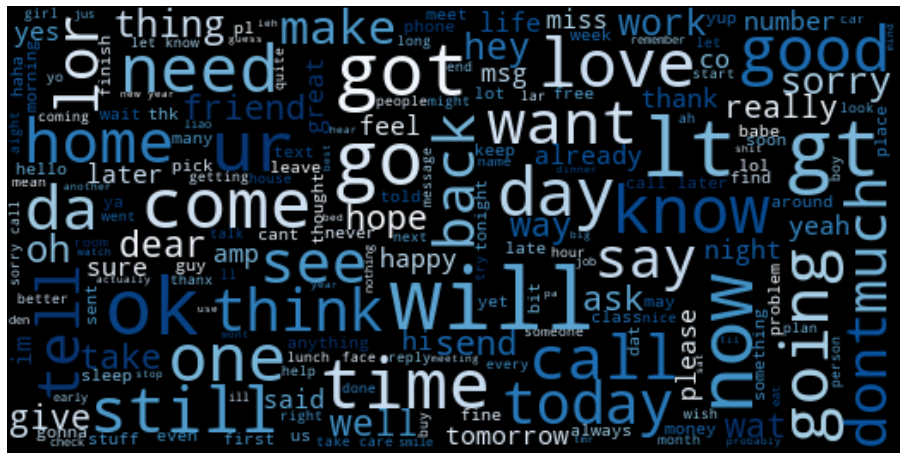

In [87]:
ham_message_cloude = WordCloud(width=520, height=260, stopwords=STOPWORDS, max_font_size=50, background_color="black", colormap='Blues').generate(ham_message_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_message_cloude, interpolation='bilinear')
plt.axis('off')
plt.show()

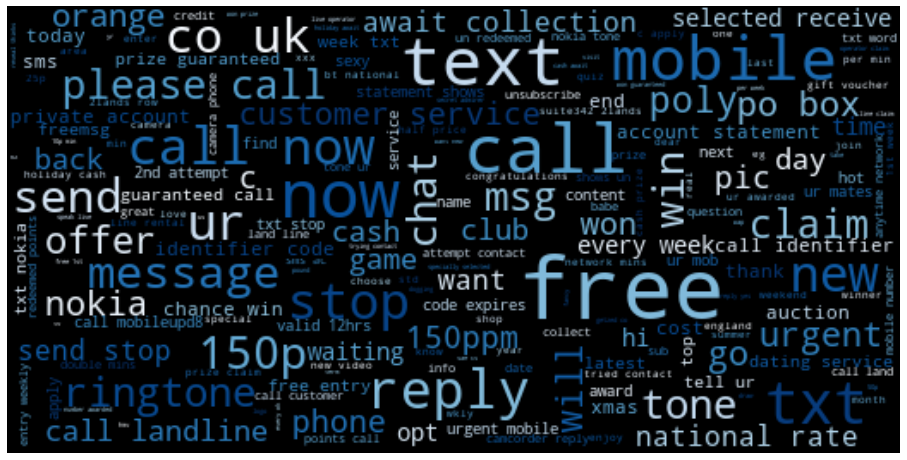

In [88]:
# Wordcloude for spam messages
spam_message_cloude = WordCloud(width=520, height=260, stopwords=STOPWORDS, max_font_size=50, background_color="black", colormap='Blues').generate(spam_message_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_message_cloude, interpolation='bilinear')
plt.axis('off')
plt.show()

In [89]:
# Separating the ham and spam messages from test data set
ham_message_test = test_data[test_data.Type == 'ham'] # taking only 'ham' messages
spam_message_test = test_data[test_data.Type == 'spam'] # taking only 'spam' messages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


15.478164731896074

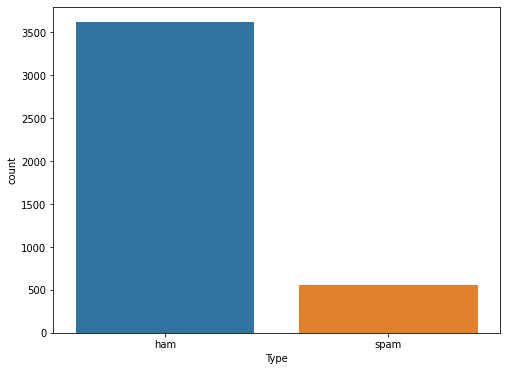

In [90]:
# Balancing the train data
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train_data.Type)
# Presentage of the data
(len(spam_message)/len(ham_message))*100


In [91]:
# Downsampling the train data
ham_message_df = ham_message.sample(n = len(spam_message), random_state= 44)
spam_message_df = spam_message
print(ham_message_df.shape, spam_message_df.shape)

(560, 2) (560, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

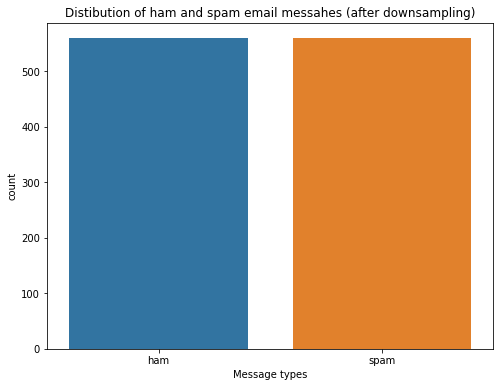

In [92]:
# Creating now a new data frame with these messages
message_df = ham_message_df.append(spam_message_df).reset_index(drop = True)
plt.figure(figsize=(8,6))
sns.countplot(message_df.Type)
plt.title('Distibution of ham and spam email messahes (after downsampling)')
plt.xlabel('Message types')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


15.53156146179402

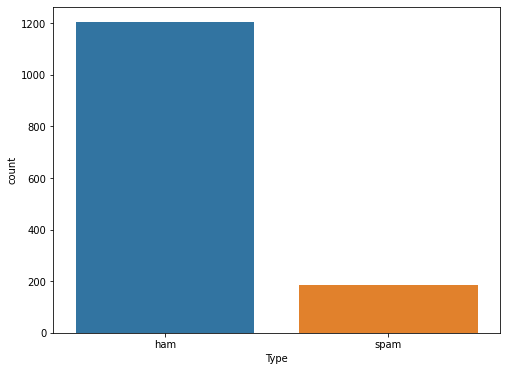

In [93]:
# Balancing the test data
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(test_data.Type)
# Presentage of the data
(len(spam_message_test)/len(ham_message_test))*100

In [94]:
# Downsampling the test data
ham_message_df_test = ham_message_test.sample(n = len(spam_message_test), random_state= 44)
spam_message_df_test = spam_message_test
print(ham_message_df_test.shape, spam_message_df_test.shape)

(187, 2) (187, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

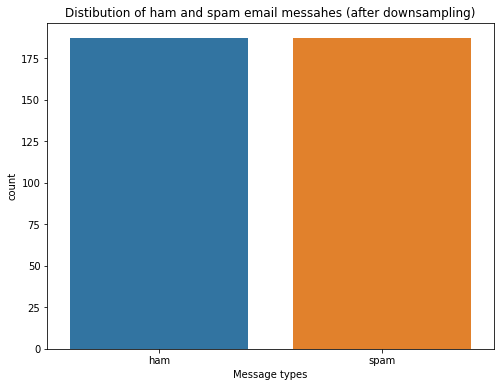

In [95]:
# Creating now a new data frame with these messages
message_df_test = ham_message_df_test.append(spam_message_df_test).reset_index(drop = True)
plt.figure(figsize=(8,6))
sns.countplot(message_df_test.Type)
plt.title('Distibution of ham and spam email messahes (after downsampling)')
plt.xlabel('Message types')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


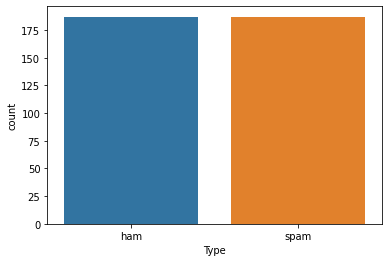

In [96]:
sns.countplot(message_df_test.Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


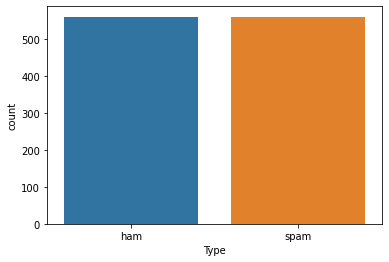

In [97]:
sns.countplot(message_df.Type)

In [98]:
# Seeing the lengs of messages and word counts in messages
message_df['text_length'] = message_df['Message'].apply(len)
message_df_test['text_length'] = message_df['Message'].apply(len)

# Calulcate the average length by lable types
lables = message_df.groupby('Type').mean()
lables

,text_length
Type,
ham,73.4875
spam,138.7500


In [99]:
lables_test = message_df_test.groupby('Type').mean()
lables_test

,text_length
Type,
ham,72.786096
spam,71.572193


In [100]:
# Preparing the data for training
# Transforming the 'ham' and 'spam' to 0 and 1
message_df['message_type'] = message_df['Type'].map({'ham': 0, 'spam': 1})
message_labels = message_df['message_type'].values
message_df_test['message_type'] = message_df_test['Type'].map({'ham': 0, 'spam': 1})
message_labels_test = message_df_test['message_type'].values

In [101]:
message_labels.shape

(1120,)

In [102]:
message_labels_test.shape

(374,)

In [103]:
# Tokenization of the words
# Defininf the needed parameters
max_lenght = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 500

train_data = message_df['Message']
train_labels = message_labels
test_data = message_df_test['Message']
test_labels = message_labels_test

In [104]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, char_level=False, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

In [105]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'the': 6,
 'call': 7,
 'your': 8,
 'for': 9,
 'u': 10,
 'is': 11,
 'and': 12,
 'now': 13,
 'or': 14,
 'free': 15,
 'in': 16,
 '2': 17,
 'on': 18,
 'have': 19,
 'of': 20,
 'ur': 21,
 '4': 22,
 'txt': 23,
 'are': 24,
 'from': 25,
 'with': 26,
 'get': 27,
 'me': 28,
 'just': 29,
 'text': 30,
 'mobile': 31,
 'stop': 32,
 'this': 33,
 'reply': 34,
 'my': 35,
 'so': 36,
 'will': 37,
 'be': 38,
 'that': 39,
 'no': 40,
 'it': 41,
 'www': 42,
 'our': 43,
 'we': 44,
 'out': 45,
 'can': 46,
 'claim': 47,
 'at': 48,
 'only': 49,
 'send': 50,
 'new': 51,
 'go': 52,
 'do': 53,
 'not': 54,
 'prize': 55,
 'up': 56,
 'been': 57,
 'if': 58,
 'cash': 59,
 't': 60,
 'nokia': 61,
 'week': 62,
 'uk': 63,
 '150p': 64,
 'all': 65,
 "i'm": 66,
 '1': 67,
 'ok': 68,
 'know': 69,
 'com': 70,
 'but': 71,
 'win': 72,
 'co': 73,
 'won': 74,
 'tone': 75,
 'what': 76,
 'who': 77,
 '50': 78,
 'when': 79,
 'how': 80,
 'r': 81,
 'service': 82,
 'there': 83,
 'phone': 8

In [106]:
tot_words = len(word_index)
print(tot_words)

4091


In [107]:
# Sequancing and Padding
training_seq = tokenizer.texts_to_sequences(train_data)
training_pad = tf.keras.preprocessing.sequence.pad_sequences(training_seq, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(test_data)
test_pad = tf.keras.preprocessing.sequence.pad_sequences(test_seq, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)

In [108]:
training_pad.shape

(1120, 50)

In [109]:
test_pad.shape

(374, 50)

In [110]:
# Hyperparameters for training the model
vocabulary_size = 500
embedding_dim = 16
drop_value = 0.2 
n_dense = 24

In [111]:
# Buidling a model
model = keras.Sequential([
  keras.layers.Embedding(vocabulary_size, embedding_dim, input_length=max_lenght),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(24, activation='relu'),
  keras.layers.Dropout(drop_value),
  keras.layers.Dense(1, activation='sigmoid')                     
])

In [112]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [113]:
# Compling a model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
# Training the model
epochs = 20
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(training_pad, train_labels, epochs=epochs, validation_data=(test_pad, test_labels), callbacks=[early_stop], verbose=2)

Epoch 1/20
35/35 - 1s - loss: 0.6853 - accuracy: 0.6438 - val_loss: 0.6765 - val_accuracy: 0.8182
Epoch 2/20
35/35 - 0s - loss: 0.6602 - accuracy: 0.7866 - val_loss: 0.6400 - val_accuracy: 0.8476
Epoch 3/20
35/35 - 0s - loss: 0.6067 - accuracy: 0.8500 - val_loss: 0.5712 - val_accuracy: 0.8583
Epoch 4/20
35/35 - 0s - loss: 0.5284 - accuracy: 0.8705 - val_loss: 0.4877 - val_accuracy: 0.8743
Epoch 5/20
35/35 - 0s - loss: 0.4376 - accuracy: 0.8830 - val_loss: 0.4083 - val_accuracy: 0.8743
Epoch 6/20
35/35 - 0s - loss: 0.3579 - accuracy: 0.8982 - val_loss: 0.3458 - val_accuracy: 0.8850
Epoch 7/20
35/35 - 0s - loss: 0.2993 - accuracy: 0.9054 - val_loss: 0.2943 - val_accuracy: 0.9011
Epoch 8/20
35/35 - 0s - loss: 0.2529 - accuracy: 0.9259 - val_loss: 0.2525 - val_accuracy: 0.9118
Epoch 9/20
35/35 - 0s - loss: 0.2102 - accuracy: 0.9393 - val_loss: 0.2212 - val_accuracy: 0.9278
Epoch 10/20
35/35 - 0s - loss: 0.1825 - accuracy: 0.9491 - val_loss: 0.1935 - val_accuracy: 0.9332
Epoch 11/20
35/35 -

In [115]:
# Evaluating the model on test data
model.evaluate(test_pad, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9572


[0.12354978173971176, 0.9572192430496216]

In [116]:
# Ploting the training history
metrics = pd.DataFrame(history.history)

In [117]:
metrics.rename(columns= {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace=True)

def plot_graphs(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('Training and Valudation ' + string)
  plt.xlabel('Nuber of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])

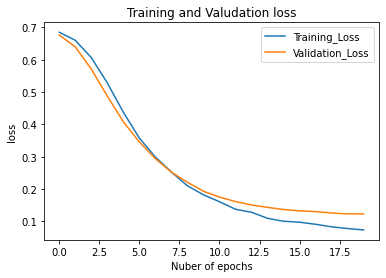

In [118]:
plot_graphs('Training_Loss', 'Validation_Loss', 'loss')

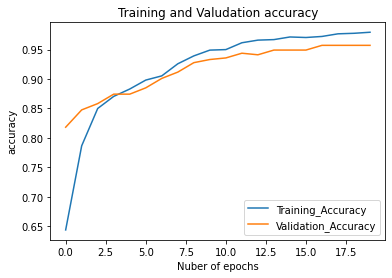

In [119]:
plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [120]:
# Predicting the messages
pd.options.display.max_colwidth=100
test_data_org.tail()

,Type,Message
1386,ham,true dear..i sat to pray evening and felt so.so i sms'd you in some time...
1387,ham,"what will we do in the shower, baby?"
1388,ham,where are you ? what are you doing ? are yuou working on getting the pc to your mom's ? did you ...
1389,spam,ur cash-balance is currently 500 pounds - to maximize ur cash-in now send cash to 86688 only 150...
1390,spam,not heard from u4 a while. call 4 rude chat private line 01223585334 to cum. wan 2c pics of me g...


In [121]:
# Reading the orginial data
train_data_org = pd.read_csv(train_file_path, sep = '\t', names =COLUMN_NAMES, header=0)
test_data_org = pd.read_csv(test_file_path, sep = '\t', names =COLUMN_NAMES, header=0)

In [122]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  new_seqance = tokenizer.texts_to_sequences([pred_text])
  padded = keras.preprocessing.sequence.pad_sequences(new_seqance, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)
  prediction = model.predict(padded)
  if prediction[0,0] <= 0.5:
    message_dec = 'ham'
  else:
    message_dec = 'spam'
  prediction = [prediction[0,0],  message_dec]
  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[0.016908547, 'ham']


In [123]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
